## 业务场景

利用用户历史行为数据：'用户标识', '业务类型', '主叫时长（分）', '被叫时长（分）', '免费流量', '计费流量',
          '月均上网时长（分）', '入网时长（天）', '最近一次缴费金额（元）', '总缴费金额(元)', '缴费次数',
          '余额'等信息，
判断是否潜在合约客户 vs 单卡客户：

## 字段信息：
名称       | 说明   | 类型  |
--------------|---------|--------|-----
user_id     |用户标识 | int   |
service_kind  |业务类型 | string | 2G\3G\4G
call_duration|主叫时长（分）|
called_duration|被叫时长（分）
in_package_flux|免费流量
out_package_flux|计费流量
monthly_online_duration|月均上网时长（分）|
net_duration |入网时长（天） |long
last_recharge_value|最近一次缴费金额（元）
total_recharge_value|总缴费金额(元)|
total_recharge_count|缴费次数
balanced|余额（元）|
contractuser_flag|是否潜在合约用户



In [1]:
#导入常用的库
# numpy: python中常用的多维数值计算库，常用简称 np
# pandas:python中的数据分析库，常用简称 pd
# matplotlib :python中的图形库，常用简称plt
# %matplotlib inline：IPython魔法函数（Magic Functions），可以内嵌绘图，并且可以省略掉plt.show()这一步
#约4行代码：
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#设定绘图时的中文字体的设置
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

## 读取运营商数据

In [ ]:
#使用pandas的读取csv文件的函数 pd.read_csv(),生成数据的dataframe
#数据文件名：carrier_contractuser.csv
#编码格式：utf8
#分隔符： |
#约1行代码:



#显示前5行:
#约1行代码:




In [3]:
#预期结果如下

,USER_ID,SERVICE_KIND,CALL_DURATION,CALLED_DURATION,IN_PACKAGE_FLUX,OUT_PACKAGE_FLUX,MONTHLY_ONLINE_DURATION,NET_DURATION,LAST_RECHARGE_VALUE,TOTAL_RECHARGE_VALUE,TOTAL_RECHARGE_COUNT,BALANCED,CONTRACTUSER_FLAG
0,66069,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64410,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,60110,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,69600,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,64683,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


In [4]:
#保存英文字段名称：
#提示：使用.columns()方法进行保存
#约1行代码：
en_col = data.columns.tolist()

#中文字段名称
ch_col = ['用户标识', '业务类型', '主叫时长（分）', '被叫时长（分）', '免费流量', '计费流量',
          '月均上网时长（分）', '入网时长（天）', '最近一次缴费金额（元）', '总缴费金额(元)', '缴费次数',
          '余额', '是否潜在合约用户']

#转换为中文字段
#提示：使用.columns()方法进行替换
#约1行代码：
data.columns =ch_col

#显示前5行:
#约1行代码：
data.head()

,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,66069,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64410,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,60110,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,69600,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,64683,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


## 数据探索

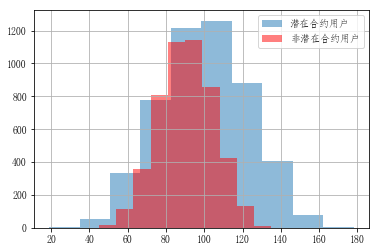

In [5]:
#不同用户的主叫时长分布情况对比

#设置dataframe的索引筛选条件
#提示：data[column_name] == value
#约1行代码：
cond = data['是否潜在合约用户']==1

#潜在合约用户的主叫时长（分）分布情况
#提示：使用 dataframe.hist()方法
#约1行代码：
data[cond]['主叫时长（分）'].hist(alpha =0.5,label='潜在合约用户')

#非潜在合约用户的主叫时长（分）分布情况：
#提示：使用 dataframe.hist()方法
#约1行代码：
data[~cond]['主叫时长（分）'].hist(color='r',alpha = 0.5,
                            label='非潜在合约用户')

# 显示图形的标签
#提示：使用 plt.legend()方法
#约1行代码：
plt.legend()

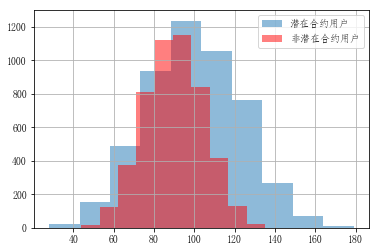

In [6]:
#不同用户的被叫时长分布情况对比

#设置dataframe的索引筛选条件
#提示：data[column_name] == value
#约1行代码：
cond = data['是否潜在合约用户']==1

#潜在合约用户的被叫时长（分）分布情况
#提示：使用 dataframe.hist()方法
#约1行代码：
data[cond]['被叫时长（分）'].hist(alpha =0.5,label='潜在合约用户')

#非潜在合约用户的被叫时长（分）分布情况：
#提示：使用 dataframe.hist()方法
#约1行代码：
data[~cond]['被叫时长（分）'].hist(color='r',alpha = 0.5,
                            label='非潜在合约用户')

# 显示图形的标签
#提示：使用 plt.legend()方法
#约1行代码：
plt.legend()

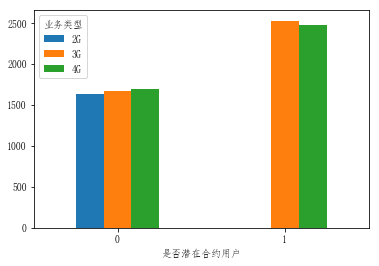

In [7]:
#不同用户的业务类型情况对比

# 对 '是否潜在合约用户','业务类型'两个字段分组统计
#提示：使用 dataframe.groupby()方法，进行分组统计。并且使用unstack()方法，将数据的行“旋转”为列。
#约1行代码：
grouped =data.groupby(['是否潜在合约用户','业务类型'])['用户标识'].count().unstack()

#绘制并列的柱状图
#提示：使用dataframe.plot(kind='bar')方法
#约1行代码：
grouped.plot(kind= 'bar',alpha =1.0,rot = 0)

In [8]:
#对目标数据统计，查看是否平衡
#提示：使用dataframe.value_counts()方法
#约1行代码：
data['是否潜在合约用户'].value_counts()

1    5003
0    4997
Name: 是否潜在合约用户, dtype: int64

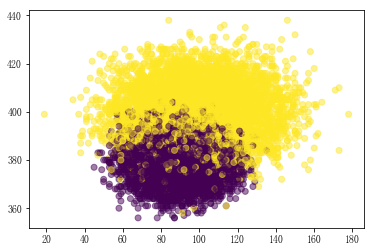

In [9]:
#主叫时长（分）&免费流量 与 是否潜在合约用户的关系\
#约2行代码：
y = data.loc[:,'是否潜在合约用户']
plt.scatter(data.loc[:,'主叫时长（分）'],data.loc[:,'免费流量'],c=y,alpha=0.5)

## 数据预处理

In [10]:
#分割特征数据集和标签数据集
#提示：使用dataframe的i.lloc或者.loc方法选取不同字段（列）
#约2行代码：
X = data.loc[:,'业务类型':'余额']
y= data.loc[:,'是否潜在合约用户']

#打印特征数据为X 和目标数据y的形状：
#约2行代码:
print('The shape of X is {0}'.format(X.shape))
print('The shape of y is {0}'.format(y.shape))

The shape of X is (10000, 11)
The shape of y is (10000,)


### 类别特征编码

In [ ]:
# 引入  sklearn.preprocessing类中的OneHotEncoder算法库
from sklearn.preprocessing import OneHotEncoder


#自定义转换函数
#提示：将各类型变量转化为数值：‘2G’->2,‘3G’->3,'4G'->4

def service_mapping(cell):
    #约3行代码：

    
    

#将业务类型的string型值映射为整数型
#约2行代码：


#生成用OncHotEncoder实例
#约1行代码：

#使用OncHotEncoder转化类型特征为0/1编码的多维特征
#约1行代码：

# #0/1编码的多维特征的名称
#约2行代码：



#生成0-1编码的dataframe
#约1行代码：


#将生成0-1编码的dataframe加入原有特征数据，生成新的特征数据矩阵X_enc 
#约1行代码：

#显示前5行
#约1行代码：

In [11]:
#预期结果如下

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,2G,3G,4G
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0.0,1.0,0.0
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0.0,1.0,0.0
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,0.0,1.0,0.0
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,0.0,0.0,1.0
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,0.0,0.0,1.0


### 数据归一化
svm由于内部做内积运算，为了消除不同特征不同度量尺度对数据的影响，需要对数据做归一化处理

In [ ]:
#提示：引入归一化方法：sklearn.preprocessing.normalize()
#约1行代码:


#对训练数据进行归一化
#约1行代码:


#验证归一化
#约1行代码:




In [12]:
#预期结果如下

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 分割训练集和测试集

In [ ]:
# 引入sklearn.model_selection的方法train_test_split




#按照0.8:0.2的比例，分割训练集和测试集：X_train,X_test,y_train,y_test， random_state=112
#约1行代码：





#打印分割后的训练集和测试集：X_train,X_test的形状
#约2行代码:




The shape of X_train is (8000, 13)
The shape of X_test is (2000, 13)


In [ ]:
#生成归一化后的数据可视化
#主叫时长（分）&被叫时长 与 是否潜在合约用户的关系
#约1行代码:



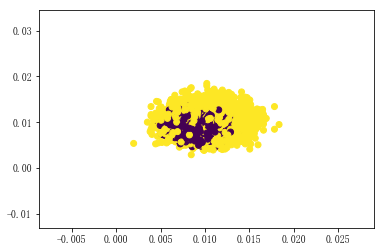

In [14]:
#预期结果如下

### 训练简单模型: 线性超平面模型

In [ ]:
#引入svm的算法库：skelearn.svm


#线性核svm模型的实例化
#约1行代码:


#在训练集上训练模型
#约1行代码:



#在测试集上预测
#约1行代码:





### 线性超平面模型的模型评估

In [ ]:
#引入sklearn类中的 metrics测度类


#计算正确率
#约2行代码:



#查看混淆举证
#约1行代码:




In [16]:
#预期结果如下

The accuracy score of the model is: 0.8085


array([[784, 254],
       [129, 833]], dtype=int64)

### 训练核函数=rbf的SVM算法：调参
- 惩罚系数C:
- gamma：

In [ ]:
# 引入网格检索方法sklearn.model_selection.GridSearchCV()



# 设置惩罚系数C的范围
#约1行代码:



# 设置gamma的范围
#约1行代码:



#设计检索的网格：
# 提示：建立一个dict{'C':range,
#              'gamma':range}
#约1行代码:




#创建rbf核函数的svm实例
#提示：可是根据自己电脑配置适当增加cache_size,random_state=117
#约1行代码:




#创建GridSearchCV实例
#约1行代码:




# 使用GridSearch()方法在训练集上训练
#约1行代码:
#svm训练时间较长，大概5-8分钟




In [ ]:
#显示网格检索的最优分数，最优参数，最优模型
# 提示：使用 GridSearchCV.best_score_
# 提示：GridSearchCV.best_params_
# 提示：GridSearchCV.best_estimator_
#约3行代码：






In [18]:
#预期结果如下

0.989875
{'C': 100000.0, 'gamma': 100.0}
SVC(C=100000.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=117, shrinking=True,
  tol=0.001, verbose=False)


## 使用最优超参再次进行训练

In [19]:
# 建立决策树实例
#使用使用字典型参数传入：**gsearch.best_params_
#约1行代码：


# 在训练集上训练
#约1行代码：



# 在测试集上预测
#约1行代码：




### 模型评估

In [ ]:
#计算并打印模型准确率
#提示：使用 metrics.accuracy_score()方法
#约2行代码：


In [20]:
#计算并打印模型准确率
#提示：使用 metrics.accuracy_score()方法
#约2行代码：




The accuracy is 0.991500


In [21]:
#预期结果如下

array([[1036,    2],
       [  15,  947]], dtype=int64)

### 绘制roc曲线和auc值

In [ ]:
#存储对类别1的预测概率
#提示：使用.predict_proba()方法
#约1行代码:




#计算不同阈值的false positive rate 和 true positive rate
#提示：使用metric.roc_curve()方法：第一个参数是真实值，第二个参数是预测值
#fpr: false positive rate (=1- specifity), tpr = true postive rate
#约1行代码:




#绘制曲线图：以false positive rate 为很轴和 true positive rate为纵轴
#约1行代码:




#设置x，y轴的范围：[0.0, 1.0]
#约2行代码:




#计算AUC值
#约1行代码:




#设置图形的标题
#约1行代码:




#设置图形的x,y轴便签名称
#约1行代码:



#绘制网格线
#约1行代码:



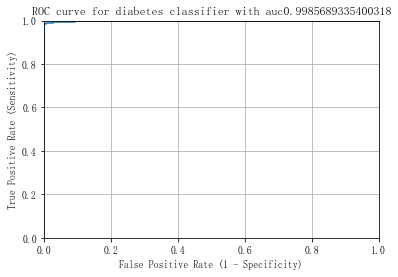

In [22]:
#预期结果如下